Homework 2   Yutong Ji

# Part 1. Numerical Simulation of the 2-Body Problem

According to $F=u*a$ where F is the gravitational force, u is reduced mass and a is the relative acceleration. We find when velocity $v_{0}= \sqrt{2}$ , the two bodies rotate around each other. ( $G=M_{1}=M_{2}=1$, $r=1$ )

##  Numerical integration ( $\Delta t=0.01$) 

### $v=v_{0}/\sqrt{2}=1$

The final eccentricity is  0.522009057889


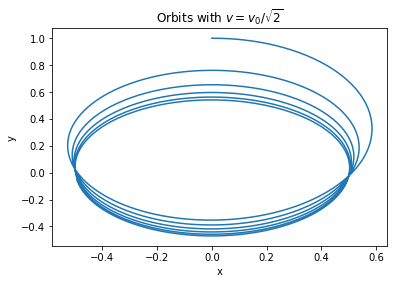

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

G=1
m1=m2=1.0
M=m1+m2
dt=0.01  #constants

vx=1.0
vy=0
v=np.array([vx,vy]) #set vx=1, vy=0 to satisfy v=0

x=0
y=1.0
r=np.array([x,y])  #set initial values of position
x1=[x]
y1=[y]             #x1,y1 is arrays where the position imformation puts

vvalue=np.linalg.norm(v) 
rvalue=np.linalg.norm(r)


for h in np.arange(0,10,dt):
    vvalue=np.linalg.norm(v)
    rvalue=np.linalg.norm(r)
    r=r+v*dt
    v=v-dt*(G*M)*r/rvalue**3    
    x1.append(r[0])
    y1.append(r[1])
    
ex=(vvalue**2*r[0]+np.inner(r,v)*v[0])/2-r[0]
ey=(vvalue**2*r[1]+np.inner(r,v)*v[1])/2-r[1]    
e=np.linalg.norm([ex,ey])
print('The final eccentricity is ',e)
plt.plot(x1,y1)
plt.title('Orbits with $v=v_{0}/\sqrt{2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('1.pdf',format='pdf')

### $v>\sqrt{2}v_{0}$

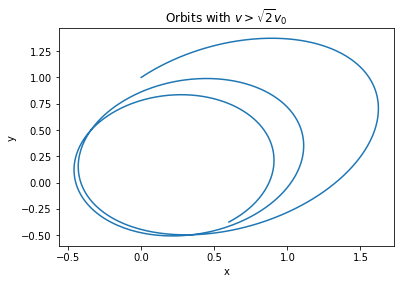

In [6]:
#same with above, just change the initial velocity
vx=1.1
vy=1.0 #v=2.41
v=np.array([vx,vy]) #set vx=1, vy=0 to satisfy v=0

x=0
y=1.0
r=np.array([x,y])  #set initial values of position
x1=[x]
y1=[y]             #x1,y1 is arrays where the position imformation puts

for h in np.arange(0,10,dt):
    vvalue=np.linalg.norm(v)
    rvalue=np.linalg.norm(r)
    r=r+v*dt
    v=v-dt*(G*M)*r/rvalue**3    
    x1.append(r[0])
    y1.append(r[1])
     

plt.plot(x1,y1)
plt.title('Orbits with $v>\sqrt{2}v_{0}$')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('2.pdf',format='pdf')

### With decreasing time step

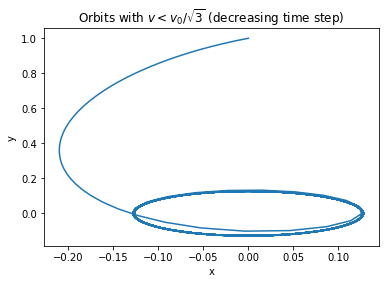

In [7]:
#same with above, just change the initial velocity and dt
vx=1/2
vy=1/2
v=np.array([vx,vy]) #set vx=1, vy=0 to satisfy v=0

x=0
y=1.0
r=np.array([x,y])  #set initial values of position
x1=[x]
y1=[y]             #x1,y1 is arrays where the position imformation puts


for h in np.arange(10,0,-dt):
    vvalue=np.linalg.norm(v)
    rvalue=np.linalg.norm(r)
    r=r-v*dt
    v=v+dt*(G*M)*r/rvalue**3    
    x1.append(r[0])
    y1.append(r[1])

plt.plot(x1,y1)
plt.title('Orbits with $v<v_{0}/\sqrt{3}$ (decreasing time step)')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('2.pdf',format='pdf')

# Part 2. Error Analysis of Euler scheme

### a.1 dt=0.01

The initial 3 different eccentricities are  [ 0.70710678  0.51732485  0.58940648]
The initial energy is [-1.5    -1.6175 -1.8475]
When dt=0.01,the final energy is   [ -3.08210498  42.24688003  -8.26366536]
The energy error is  [  2.69246561  42.21590418   8.0544962 ]


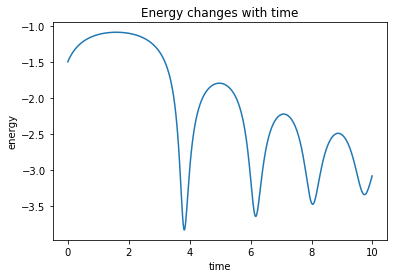

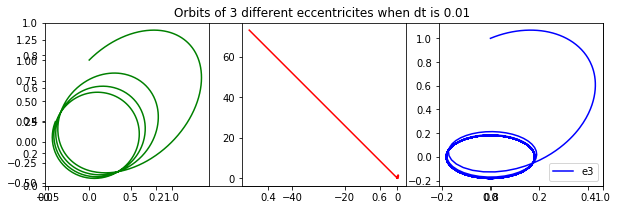

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

G=1
m1=m2=1.0
M=m1+m2
u=m1*m2/(m1+m2)#constants

dt=0.01

x=np.array([0,0,0])
y=np.array([1.0,1.0,1.0])
r=([x,y])
rvalue=np.sqrt(x**2+y**2)

vx=np.array([1.0,0.3,0.6])
vy=np.array([1.0,1.2,0.5])
v=np.array([vx,vy]) 
vvalue=np.sqrt(vx**2+vy**2)
ex=(vvalue**2*r[0]+(r[0]*v[0]+r[1]*v[1])*v[0])/2-r[0]
ey=(vvalue**2*r[1]+(r[0]*v[0]+r[1]*v[1])*v[1])/2-r[1]
evalue=np.sqrt(ex**2+ey**2)#calculate the value of initial eccentricity
print('The initial 3 different eccentricities are ', evalue) #choose different eccentricities with different initial velocities

energy10=(vvalue**2)/4-M/rvalue #calculate initial energy
print('The initial energy is',energy10)
energy1=[energy10]


x1=[x[0]]
x2=[x[1]]
x3=[x[2]]
y1=[y[0]]
y2=[y[1]]
y3=[y[2]]

#loop over time with 3 different initial eccentricities
for h in np.arange(0,10,dt):
    rvalue=np.sqrt(r[0]**2+r[1]**2)
    vvalue=np.sqrt(v[0]**2+v[1]**2)
    r=r+v*dt
    v=v-dt*(G*M)*r/rvalue**3    
    x1.append(r[0][0])
    y1.append(r[1][0])
    x2.append(r[0][1])
    y2.append(r[1][1])
    x3.append(r[0][2])
    y3.append(r[1][2])
        
    energy1.append((vvalue**2)/4-M/rvalue)#store energy information during evert time
    
energy1f=(vvalue**2)/4-M/rvalue
error1=np.sqrt(energy1f**2-energy10**2)
print('When dt=0.01,the final energy is  ',energy1f)
print('The energy error is ',error1)#calculate final energy and energy error 

energy1=np.array(energy1)
erg1=energy1[1:,0]
plt.plot(np.arange(0,10,dt),erg1)
plt.title('Energy changes with time')
plt.xlabel('time')
plt.ylabel('energy')#plot energy changing with time

f = plt.figure(figsize=(10,3))
plt.title('Orbits of 3 different eccentricites when dt is 0.01 ')
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax1.plot(x1,y1,'g',label='e1')
plt.legend(loc='best')
ax2.plot(x2,y2,'r',label='e2')
plt.legend(loc='best')
ax3.plot(x3,y3,'b',label='e3')
plt.legend(loc='best') #plot orbits for 3 different eccentricities             

### a.2 dt=0.001

The initial 3 different eccentricities are  [ 0.70710678  0.51732485  0.58940648]
The initial energy is [-1.5    -1.6175 -1.8475]
When dt=0.001,the final energy is   [ -1.27747463 -33.15338061  -8.27566703]
The energy error is  [         nan  33.11389949   8.06680907]


/Users/janet/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


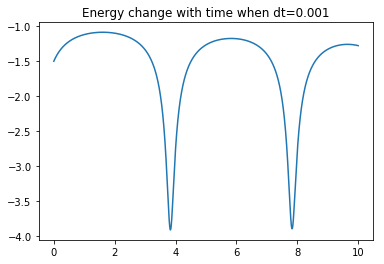

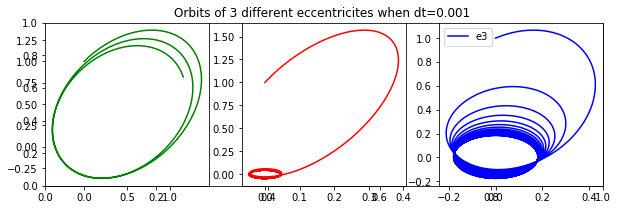

In [10]:
#almost same with above, just changed dt to 0.001
#I tried to use a for loop over dt array,but failed. So I just used this simple but silly way
dt=0.001
x=np.array([0,0,0])
y=np.array([1.0,1.0,1.0])
r=([x,y])
rvalue=np.sqrt(x**2+y**2)

vx=np.array([1.0,0.3,0.6])
vy=np.array([1.0,1.2,0.5])
v=np.array([vx,vy]) 
vvalue=np.sqrt(vx**2+vy**2)
ex=(vvalue**2*r[0]+(r[0]*v[0]+r[1]*v[1])*v[0])/2-r[0]
ey=(vvalue**2*r[1]+(r[0]*v[0]+r[1]*v[1])*v[1])/2-r[1]
evalue=np.sqrt(ex**2+ey**2)#calculate the value of initial eccentricity
print('The initial 3 different eccentricities are ', evalue)

energy20=(vvalue**2)/4-M/rvalue #calculate initial energy
print('The initial energy is',energy20)
energy=[energy20]


x1=[x[0]]
x2=[x[1]]
x3=[x[2]]
y1=[y[0]]
y2=[y[1]]
y3=[y[2]]

for h in np.arange(0,10,dt):
    rvalue=np.sqrt(r[0]**2+r[1]**2)
    vvalue=np.sqrt(v[0]**2+v[1]**2)
    r=r+v*dt
    v=v-dt*(G*M)*r/rvalue**3    
    x1.append(r[0][0])
    y1.append(r[1][0])
    x2.append(r[0][1])
    y2.append(r[1][1])
    x3.append(r[0][2])
    y3.append(r[1][2])
        
    energy.append((vvalue**2)/4-M/rvalue)
energy2f=(vvalue**2)/4-M/rvalue
error2=np.sqrt(energy2f**2-energy20**2)
print('When dt=0.001,the final energy is  ',energy2f)
print('The energy error is ',error2)
    
energy=np.array(energy)
erg2=energy[1:,0]
plt.plot(np.arange(0,10,dt),erg2)
plt.title('Energy change with time when dt=0.001')

f = plt.figure(figsize=(10,3))
plt.title('Orbits of 3 different eccentricites when dt=0.001 ')
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax1.plot(x1,y1,'g',label='e1')
plt.legend(loc='best')
ax2.plot(x2,y2,'r',label='e2')
plt.legend(loc='best')
ax3.plot(x3,y3,'b',label='e3')
plt.legend(loc='best')              


### a.1 dt=0.01

The initial 3 different eccentricities are  [ 0.70710678  0.51732485  0.58940648]
The initial energy is [-1.5    -1.6175 -1.8475]


/Users/janet/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


When dt=0.001,the final energy is   [ -1.11839162 -33.33150464  -6.18289167]
The energy error is  [         nan  33.29223476   5.90041466]


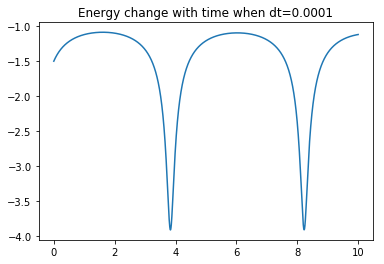

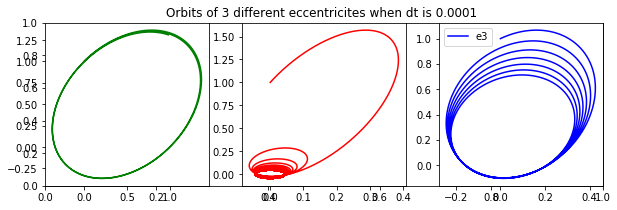

In [13]:
#Basically same as above 
dt=0.0001

x=np.array([0,0,0])
y=np.array([1.0,1.0,1.0])
r=([x,y])
rvalue=np.sqrt(x**2+y**2)

vx=np.array([1.0,0.3,0.6])
vy=np.array([1.0,1.2,0.5])
v=np.array([vx,vy]) 
vvalue=np.sqrt(vx**2+vy**2)
ex=(vvalue**2*r[0]+(r[0]*v[0]+r[1]*v[1])*v[0])/2-r[0]
ey=(vvalue**2*r[1]+(r[0]*v[0]+r[1]*v[1])*v[1])/2-r[1]
evalue=np.sqrt(ex**2+ey**2)#calculate the value of initial eccentricity
print('The initial 3 different eccentricities are ', evalue)

energy30=(vvalue**2)/4-M/rvalue #calculate initial energy
print('The initial energy is',energy30)
energy=[energy30]


x1=[x[0]]
x2=[x[1]]
x3=[x[2]]
y1=[y[0]]
y2=[y[1]]
y3=[y[2]]
for h in np.arange(0,10,dt):
    rvalue=np.sqrt(r[0]**2+r[1]**2)
    vvalue=np.sqrt(v[0]**2+v[1]**2)
    r=r+v*dt
    v=v-dt*(G*M)*r/rvalue**3    
    x1.append(r[0][0])
    y1.append(r[1][0])
    x2.append(r[0][1])
    y2.append(r[1][1])
    x3.append(r[0][2])
    y3.append(r[1][2])
        
    energy.append((vvalue**2)/4-M/rvalue)
energy3f=(vvalue**2)/4-M/rvalue
error3=np.sqrt(energy3f**2-energy30**2)
print('When dt=0.001,the final energy is  ',energy3f)
print('The energy error is ',error3)

energy=np.array(energy)
erg3=energy[1:,0]

plt.plot(np.arange(0,10,dt),erg3)
plt.title('Energy change with time when dt=0.0001')

f = plt.figure(figsize=(10,3))
plt.title('Orbits of 3 different eccentricites when dt is 0.0001 ')
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax1.plot(x1,y1,'g',label='e1')
plt.legend(loc='best')
ax2.plot(x2,y2,'r',label='e2')
plt.legend(loc='best')
ax3.plot(x3,y3,'b',label='e3')
plt.legend(loc='best')              


### a.4 Energy error chaning over different time steps

[[  2.69246561  42.21590418   8.0544962 ]
 [         nan  33.11389949   8.06680907]
 [         nan  33.29223476   5.90041466]]


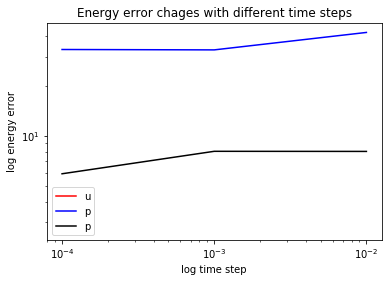

In [14]:
ddt=[0.01,0.001,0.0001]
error=np.array([error1,error2,error3])#create a 2-D array to store all error inforamtion for different dt and eccentricities
print(error)
plt.loglog(ddt,error[:,0],'r',label='0.01')#when e=e1, the error changes over 3 dt
plt.loglog(ddt,error[:,1],'b',label='0.001')#when e=e2, the error changes over 3 dt
plt.loglog(ddt,error[:,2],'k',label='0.0001')#when e=e3, the error changes over 3 dt
plt.xlabel('log time step')
plt.ylabel('log energy error')
plt.title('Energy error chages with different time steps')
plt.legend('uppper right')
plt.show()

### b.0 First try leapfrog with a simple example:$$dt=0.01$$

The final eccentricity is  0.435240252387


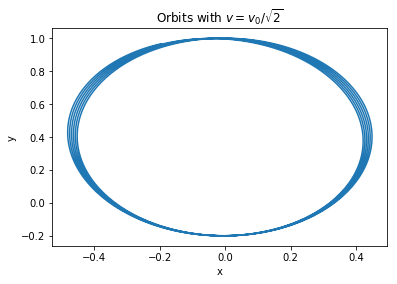

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

G=1
m1=m2=1.0
M=m1+m2
dt=0.01  #constants

vx=1.0
vy=0
v=np.array([vx,vy]) 

x=0
y=1.0
r=np.array([x,y])  #set initial values of position
x1=[x]
y1=[y]             #x1,y1 is arrays where the position imformation puts

vvalue=np.linalg.norm(v) 
rvalue=np.linalg.norm(r)


for h in np.arange(0,10,dt):
    vvalue=np.linalg.norm(v)
    rvalue=np.linalg.norm(r)
    v=v-dt/2*(G*M)*r/rvalue**3 
    r=r+v*dt
    rvalue=np.sqrt(r[0]**2+r[1]**2)
    v=v-dt/2*(G*M)*r/rvalue**3
    v=v-dt/2*(G*M)*r/rvalue**3   #main idea of leapfrog  
    x1.append(r[0])
    y1.append(r[1])
    
ex=(vvalue**2*r[0]+np.inner(r,v)*v[0])/2-r[0]
ey=(vvalue**2*r[1]+np.inner(r,v)*v[1])/2-r[1]    
e=np.linalg.norm([ex,ey])
print('The final eccentricity is ',e)
plt.plot(x1,y1)
plt.title('Orbits with $v=v_{0}/\sqrt{2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('1.pdf',format='pdf')

We can see the orbits are more smooth than before.

### b.1

The initial energy is -1.5


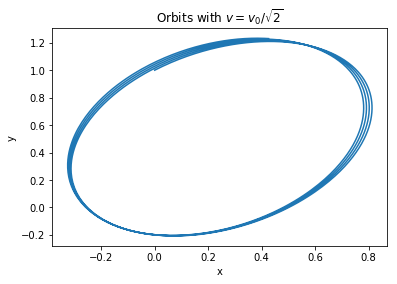

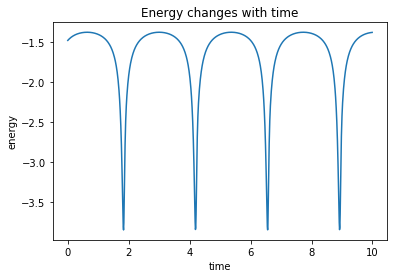

When dt=0.01,the final energy is   -1.38028823503
Leapfrog: The energy error is  0.119711764965


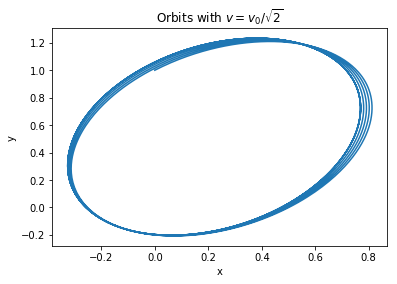

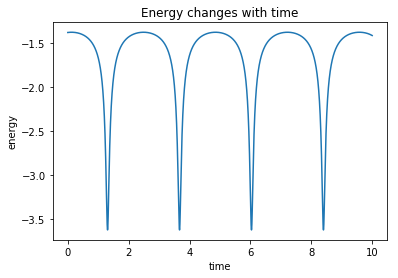

When dt=0.01,the final energy is   -1.41580793228
Leapfrog: The energy error is  0.0841920677246


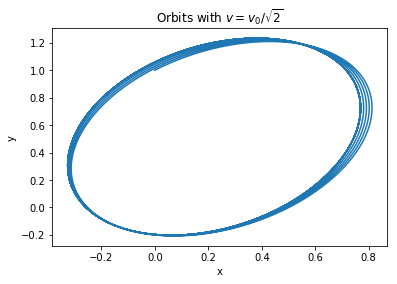

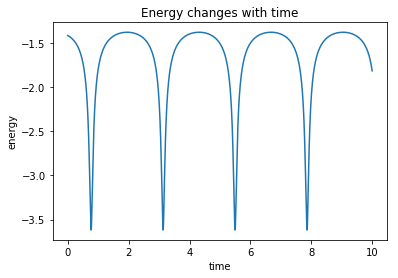

When dt=0.01,the final energy is   -1.81567659987
Leapfrog: The energy error is  0.315676599868


In [1]:
# In this part, I didn't choose 3 different eccentricities. Instead I chose one ecentricity from 3 eccentricities above
# which is vx=1.0 vy=1.0. I did this just for simplify the process. Because when i used 3 eccentricities i was not 
#able to execute for loop over different time steps. 
import matplotlib.pyplot as plt
import numpy as np
import math


G=1
m1=m2=1.0
M=m1+m2
u=m1*m2/(m1+m2)

dt=0.01  #constants

vx=1.0
vy=1.0
v=np.array([vx,vy]) #chose one eccentricity of 3 
x=0
y=1.0
r=np.array([x,y])  #set initial values of position
x1=[x]
y1=[y]             #x1,y1 is arrays where the position imformation puts

vvalue=np.linalg.norm(v) 
rvalue=np.linalg.norm(r)

energy0=(vvalue**2)/4-M/rvalue #calculate initial energy
print('The initial energy is',energy0)
erg=[[energy0],[energy0],[energy0]]
dt=np.array([0.01,0.001,0.0001])
Error=[0]
for i in range(3):#loop over different time steps
    color=['r','g','b','k']
    lable=['0.1','0.01','0.001','0.0001']

    for h in np.arange(0,10,dt[i]):
        vvalue=np.linalg.norm(v)
        rvalue=np.linalg.norm(r)
        v=v-dt[i]/2*(G*M)*r/rvalue**3 
        r=r+v*dt[i]
        rvalue=np.sqrt(r[0]**2+r[1]**2)
        v=v-dt[i]/2*(G*M)*r/rvalue**3
        v=v-dt[i]/2*(G*M)*r/rvalue**3  
        x1.append(r[0])
        y1.append(r[1])
        erg[i].append((vvalue**2)/4-M/rvalue)
    
    
    plt.plot(x1,y1)
    plt.title('Orbits with $v=v_{0}/\sqrt{2}$')
    plt.xlabel('x')
    plt.ylabel('y')
    erg[i]=np.array(erg[i])
    plt.show()
 
    plt.plot(np.arange(0,10,dt[i]),erg[i][1:])
    plt.title('Energy changes with time')
    plt.xlabel('time')
    plt.ylabel('energy')
    plt.show()

    energyf=(vvalue**2)/4-M/rvalue
    error=np.abs(energyf-energy0)
    print('When dt=0.01,the final energy is  ',energyf)
    print('Leapfrog: The energy error is ',error)
    Error.append(error)
    



[0, nan, nan, 1.0230745404459294]


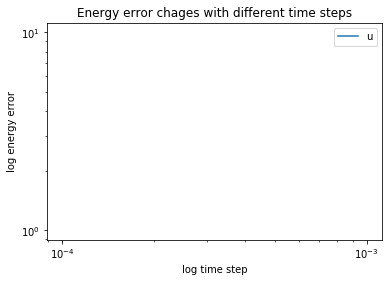

In [19]:
print(Error)
#plot error chandes with different time steps
plt.loglog(dt,Error[1:])
plt.xlabel('log time step')
plt.ylabel('log energy error')
plt.title('Energy error chages with different time steps')
plt.legend('uppper right')
plt.show()



But the error still has some problem. I haven't figured it out.